# Consider only the below columns and prepare a prediction model for predicting Price.

# Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [2]:
Corolla=pd.read_csv("C:\\Users\\Anjana\\Downloads\\ToyotaCorolla.csv",encoding='unicode_escape')

In [3]:
Corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
Corolla.shape

(1436, 38)

In [5]:
#only taking wanted columns
corolla=Corolla.loc[:,["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [6]:
corolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [7]:
corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [8]:
#checking for duplicates
corolla[corolla.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [9]:
#remove duplicates
corolla.drop_duplicates(inplace=True)

In [10]:
corolla.shape

(1435, 9)

In [11]:
corolla.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


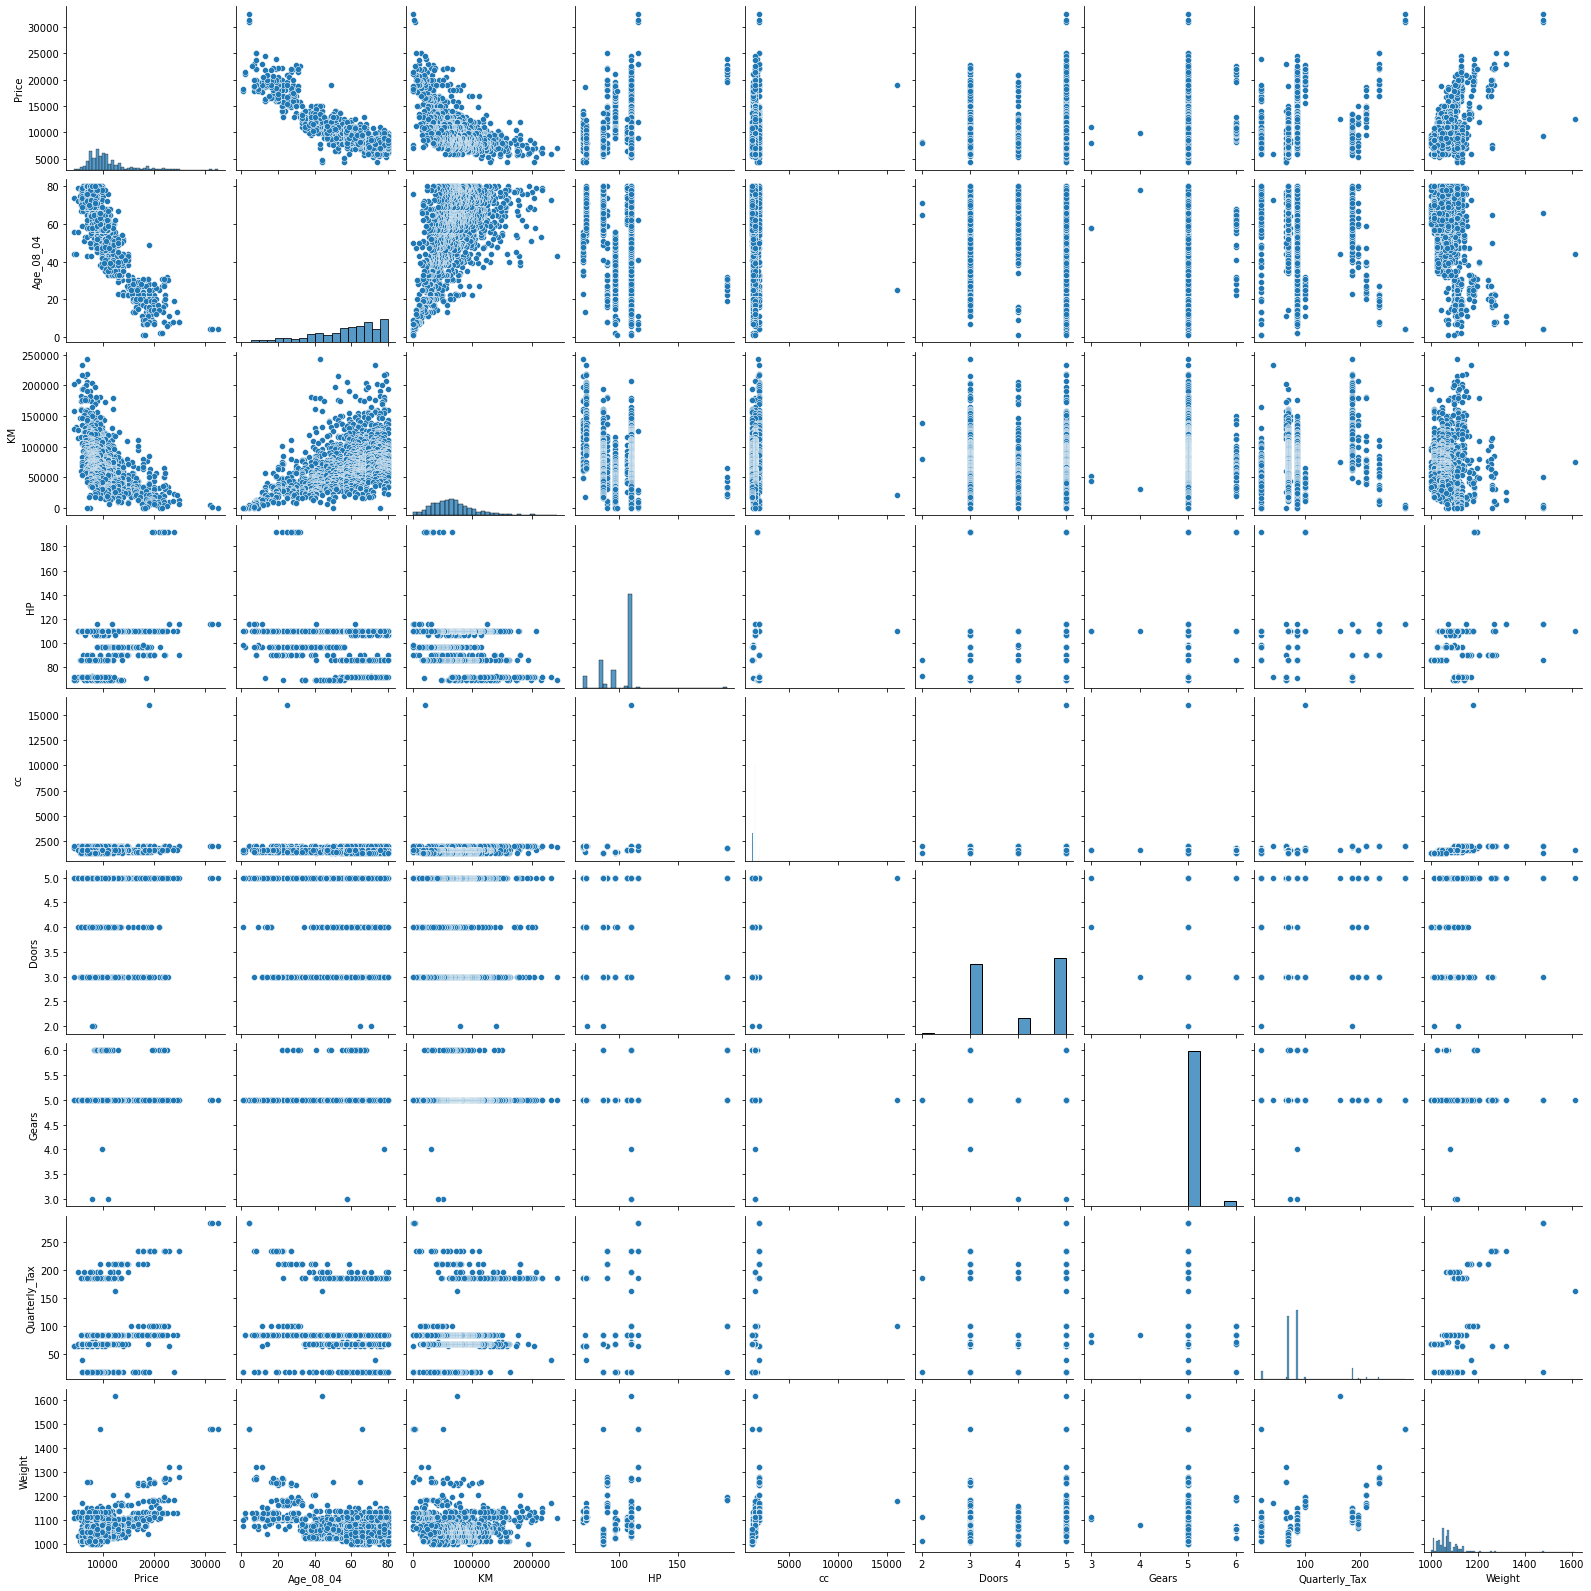

In [12]:
sns.pairplot(corolla)

<AxesSubplot:>

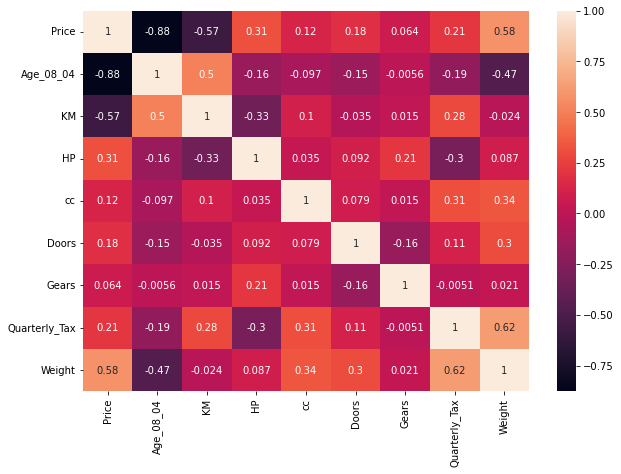

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(corolla.corr(),annot=True)

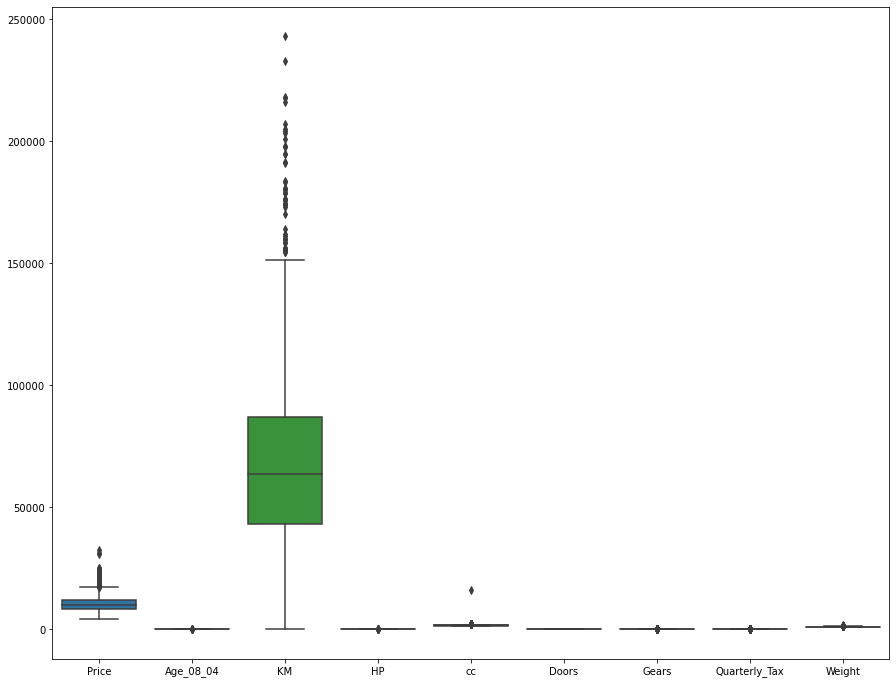

In [14]:
#checking for outliers
plt.figure(figsize=(15,12))
sns.boxplot(data=corolla)
plt.show()

In [15]:
COROLLA=corolla.copy()

In [16]:
COROLLA.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [17]:
COROLLA.shape

(1435, 9)

{'whiskers': [<matplotlib.lines.Line2D at 0x1df3f563b80>,
 'caps': [<matplotlib.lines.Line2D at 0x1df3f573160>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df3f563910>],
 'medians': [<matplotlib.lines.Line2D at 0x1df3f573700>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df3f5739d0>],
 'means': []}

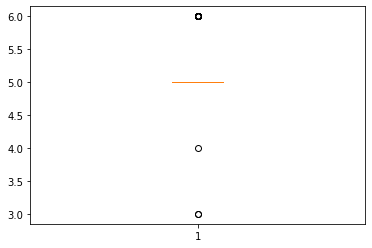

In [18]:
plt.boxplot(COROLLA['Gears'],vert=True)

In [19]:
COROLLA.Gears.value_counts()

5    1389
6      43
3       2
4       1
Name: Gears, dtype: int64

In [20]:
COROLLA=COROLLA[(COROLLA.Gears!=3)&(COROLLA.Gears!=4)]#remove outliers

In [21]:
COROLLA.shape

(1432, 9)

{'whiskers': [<matplotlib.lines.Line2D at 0x1df49b7aa60>,
 'caps': [<matplotlib.lines.Line2D at 0x1df49b89040>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df49b7a760>],
 'medians': [<matplotlib.lines.Line2D at 0x1df49b895e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df49b898b0>],
 'means': []}

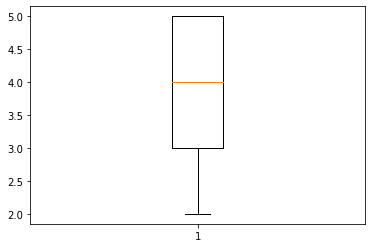

In [22]:
plt.boxplot(COROLLA['Doors'],vert=True)

In [23]:
COROLLA.Doors.value_counts()

5    672
3    621
4    137
2      2
Name: Doors, dtype: int64

In [24]:
#remove outliers
COROLLA=COROLLA[COROLLA.Doors!=2]

In [25]:
COROLLA.shape

(1430, 9)

{'whiskers': [<matplotlib.lines.Line2D at 0x1df49bdff10>,
 'caps': [<matplotlib.lines.Line2D at 0x1df49bf04f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df49bdfca0>],
 'medians': [<matplotlib.lines.Line2D at 0x1df49bf0a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df49bf0d60>],
 'means': []}

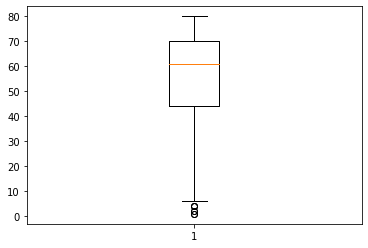

In [26]:
plt.boxplot(COROLLA['Age_08_04'],vert=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1df49c57310>,
 'caps': [<matplotlib.lines.Line2D at 0x1df49c578b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df49c57040>],
 'medians': [<matplotlib.lines.Line2D at 0x1df49c57e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df49c65160>],
 'means': []}

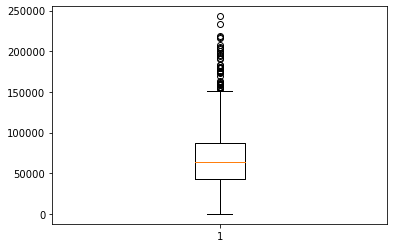

In [27]:
plt.boxplot(COROLLA['KM'],vert=True)

In [28]:
COROLLA.KM.value_counts()

36000    9
1        8
59000    7
45000    6
61000    6
        ..
65170    1
65471    1
66063    1
66527    1
16916    1
Name: KM, Length: 1260, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1df49cb7610>,
 'caps': [<matplotlib.lines.Line2D at 0x1df49cb7b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df49cb7340>],
 'medians': [<matplotlib.lines.Line2D at 0x1df49cc5100>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df49cc53d0>],
 'means': []}

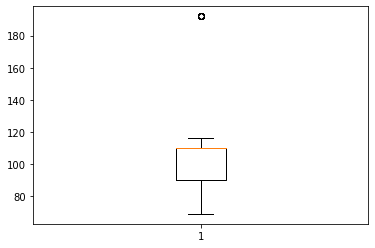

In [29]:
plt.boxplot(COROLLA['HP'],vert=True)

In [30]:
COROLLA[COROLLA.HP>180]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
8,21500,27,19700,192,1800,3,5,100,1185
10,20950,25,31461,192,1800,3,6,100,1185
11,19950,22,43610,192,1800,3,6,100,1185
12,19600,25,32189,192,1800,3,6,100,1185
13,21500,31,23000,192,1800,3,6,100,1185
14,22500,32,34131,192,1800,3,6,100,1185
15,22000,28,18739,192,1800,3,6,100,1185
16,22750,30,34000,192,1800,3,5,100,1185
49,21950,31,64982,192,1800,5,6,100,1195
53,21950,27,49866,192,1800,5,5,100,1195


In [31]:
COROLLA.loc[[8,10,11,12,13,14,15,16,49,53,141],'HP']=COROLLA[COROLLA.HP<180].HP.max()

In [32]:
COROLLA['HP'].value_counts()

110    832
86     248
97     164
72      73
90      36
69      34
107     21
116     19
98       2
71       1
Name: HP, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1df49d1b700>,
 'caps': [<matplotlib.lines.Line2D at 0x1df49d1bbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df49d1b490>],
 'medians': [<matplotlib.lines.Line2D at 0x1df49d29160>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df49d29430>],
 'means': []}

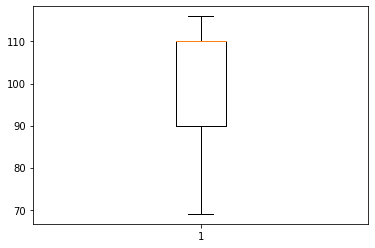

In [33]:
plt.boxplot(COROLLA['HP'],vert=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1df49d81130>,
 'caps': [<matplotlib.lines.Line2D at 0x1df49d816d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df49d72e20>],
 'medians': [<matplotlib.lines.Line2D at 0x1df49d81c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df49d81f40>],
 'means': []}

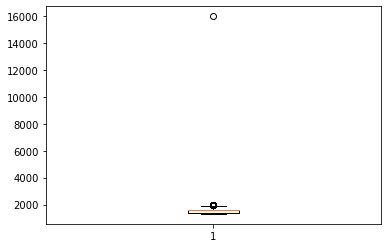

In [34]:
plt.boxplot(COROLLA['cc'],vert=True)

In [35]:
COROLLA[COROLLA.cc>6000]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [36]:
#remove outliers
COROLLA=COROLLA[COROLLA.cc!=16000]

In [37]:
COROLLA.shape

(1429, 9)

{'whiskers': [<matplotlib.lines.Line2D at 0x1df49ddbdc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1df49dec3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df49ddbaf0>],
 'medians': [<matplotlib.lines.Line2D at 0x1df49dec940>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df49decc10>],
 'means': []}

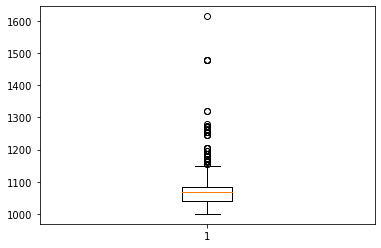

In [38]:
plt.boxplot(COROLLA['Weight'],vert=True)

In [39]:
COROLLA[COROLLA.Weight>1400]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
109,32500,4,1,116,2000,5,5,283,1480
110,31000,4,4000,116,2000,5,5,283,1480
111,31275,4,1500,116,2000,5,5,283,1480
221,12450,44,74172,110,1600,5,5,163,1615
960,9390,66,50806,86,1300,3,5,19,1480


In [40]:
COROLLA[COROLLA.Weight>1400].describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.0,5.00000,5.000000
mean,23323.000000,24.400000,26095.800000,108.80000,1780.000000,4.600000,5.0,206.20000,1507.000000
std,11387.916622,28.996552,34263.797705,13.00769,319.374388,0.894427,0.0,116.83835,60.373835
min,9390.000000,4.000000,1.000000,86.00000,1300.000000,3.000000,5.0,19.00000,1480.000000
25%,12450.000000,4.000000,1500.000000,110.00000,1600.000000,5.000000,5.0,163.00000,1480.000000
50%,31000.000000,4.000000,4000.000000,116.00000,2000.000000,5.000000,5.0,283.00000,1480.000000
75%,31275.000000,44.000000,50806.000000,116.00000,2000.000000,5.000000,5.0,283.00000,1480.000000
max,32500.000000,66.000000,74172.000000,116.00000,2000.000000,5.000000,5.0,283.00000,1615.000000


In [41]:
COROLLA.loc[[109,110,111,221,960],'Weight']=1507#mean

{'whiskers': [<matplotlib.lines.Line2D at 0x1df49e4e940>,
 'caps': [<matplotlib.lines.Line2D at 0x1df49e4eee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df49e4e640>],
 'medians': [<matplotlib.lines.Line2D at 0x1df49e5e4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df49e5e790>],
 'means': []}

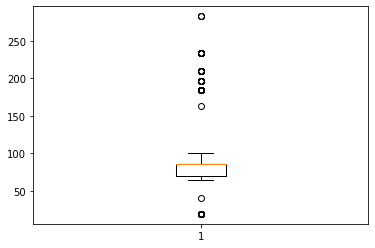

In [42]:
plt.boxplot(COROLLA['Quarterly_Tax'],vert=True)

In [43]:
COROLLA.Quarterly_Tax.value_counts()

85     611
69     559
185     95
19      71
210     18
100     18
234     18
64      18
197     14
283      3
72       2
163      1
40       1
Name: Quarterly_Tax, dtype: int64

In [44]:
COROLLA[COROLLA.Quarterly_Tax>250]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
109,32500,4,1,116,2000,5,5,283,1507
110,31000,4,4000,116,2000,5,5,283,1507
111,31275,4,1500,116,2000,5,5,283,1507


In [45]:
COROLLA.loc[[109,110,111],'Quarterly_Tax']=COROLLA[COROLLA.Quarterly_Tax<250].Quarterly_Tax.max()

{'whiskers': [<matplotlib.lines.Line2D at 0x1df49eb73d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1df49eb7970>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df49eb7100>],
 'medians': [<matplotlib.lines.Line2D at 0x1df49eb7f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df49ec4220>],
 'means': []}

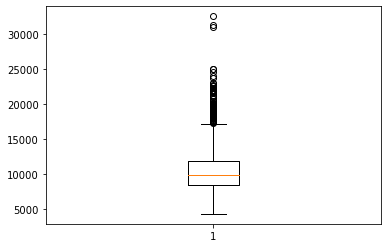

In [46]:
plt.boxplot(COROLLA['Price'])

In [47]:
COROLLA.Price.value_counts()

8950     109
9950      83
7950      61
10950     61
11950     47
        ... 
11790      1
4750       1
4350       1
21125      1
10845      1
Name: Price, Length: 236, dtype: int64

In [48]:
COROLLA[COROLLA.Price>25000]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
109,32500,4,1,116,2000,5,5,234,1507
110,31000,4,4000,116,2000,5,5,234,1507
111,31275,4,1500,116,2000,5,5,234,1507


In [49]:
COROLLA.loc[[109,110,111],"Price"]=COROLLA[COROLLA.Price<25000].Price.max()

In [50]:
COROLLA

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [51]:
#setting dummy values for door and gear
corolla1=pd.get_dummies(COROLLA,columns=['Doors','Gears'])

In [52]:
corolla1

,Price,Age_08_04,KM,HP,cc,Quarterly_Tax,Weight,Doors_3,Doors_4,Doors_5,Gears_5,Gears_6
0,13500,23,46986,90,2000,210,1165,1,0,0,1,0
1,13750,23,72937,90,2000,210,1165,1,0,0,1,0
2,13950,24,41711,90,2000,210,1165,1,0,0,1,0
3,14950,26,48000,90,2000,210,1165,1,0,0,1,0
4,13750,30,38500,90,2000,210,1170,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,69,1025,1,0,0,1,0
1432,10845,72,19000,86,1300,69,1015,1,0,0,1,0
1433,8500,71,17016,86,1300,69,1015,1,0,0,1,0
1434,7250,70,16916,86,1300,69,1015,1,0,0,1,0


In [53]:
model1=smf.ols('Price~Age_08_04+KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=corolla1).fit()

In [54]:
model1

In [55]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     964.7
Date:                Thu, 11 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:13:16   Log-Likelihood:                -12302.
No. Observations:                1429   AIC:                         2.462e+04
Df Residuals:                    1419   BIC:                         2.468e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1141.1491    623.916     -1.829      0.068   -2365.045      82.747
Age_08_04      -122.5626      2.613    -46.900      0.000    -127.689    -117.436
KM               -0.0181      0.001    -13.844      0.000      -0.021      -0.016
HP               29.3261      3.491      8.399      0.000      22.477      36.175
cc               -1.9167      0.324     -5.916      0.000      -2.552      -1.281
Doors_3        -478.3980    208.079     -2.299      0.022    -886.574     -70.222
Doors_4        -161.7309    213.281     -0.758      0.448    -580.110     256.649
Doors_5        -501.0202    233.379     -2.147      0.032    -958.824     -43.216
Gears_5       -1086.8630    308.286     -3.526      0.000   -1691.607    -482.119
Gears_6         -54.2861    349.808     -0.155      0.877    -740.482     631.910
Quarterly_Tax     4.8883      1.467      3.331      0.001       2.010       7.767
Weight           19.6651      1.158     16.989      0.000      17.394      21.936
==============================================================================
Omnibus:                      164.153   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1442.274
Skew:                          -0.087   Prob(JB):                         0.00
Kurtosis:                       7.919   Cond. No.                     7.21e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.68e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [56]:
model1.pvalues

Intercept         6.760763e-02
Age_08_04        9.613680e-291
KM                5.580460e-41
HP                1.073629e-16
cc                4.136744e-09
Doors_3           2.164309e-02
Doors_4           4.483970e-01
Doors_5           3.197716e-02
Gears_5           4.361176e-04
Gears_6           8.766949e-01
Quarterly_Tax     8.866087e-04
Weight            4.569963e-59
dtype: float64

In [57]:
model1.resid

0      -2865.086884
1      -2144.530867
2      -2388.173129
3      -1029.012770
4      -2009.346460
           ...     
1431   -1488.661256
1432    2392.680955
1433    -110.856480
1434   -1485.232321
1435   -3165.202844
Length: 1429, dtype: float64

In [58]:
predicted_price=pd.DataFrame(model1.predict())
predicted_price

,0
0,16365.086884
1,15894.530867
2,16338.173129
3,15979.012770
4,15759.346460
...,...
1424,8988.661256
1425,8452.319045
1426,8610.856480
1427,8735.232321


In [59]:
model1.rsquared

0.8595251039083697

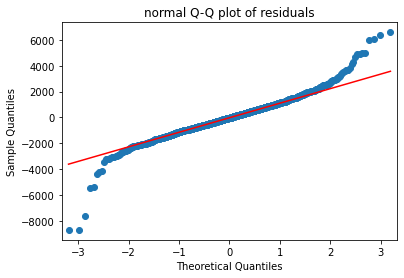

In [60]:
#residue analysis
#Q-Qplot
# test for normality of residuals
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q')
plt.title('normal Q-Q plot of residuals')
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x1df4c70f970>,
 'caps': [<matplotlib.lines.Line2D at 0x1df4c70ff10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df4c70f7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1df4c71e4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df4c71e7c0>],
 'means': []}

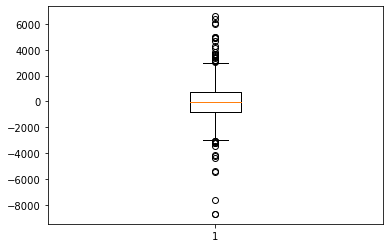

In [61]:
plt.boxplot(model1.resid)

<AxesSubplot:ylabel='Density'>

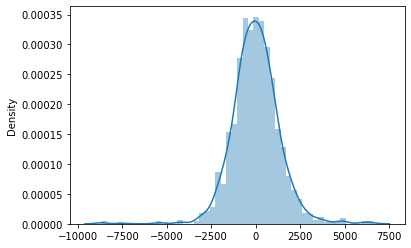

In [62]:
sns.distplot(model1.resid)

In [63]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

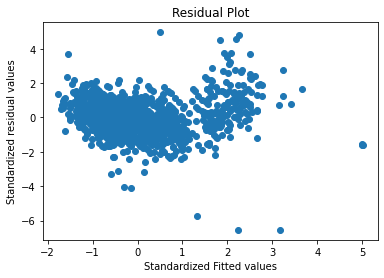

In [64]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [65]:
rsq_age = smf.ols('Age_08_04~KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=corolla1).fit().rsquared  
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols('KM~Age_08_04+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=corolla1).fit().rsquared  
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols('HP~Age_08_04+KM+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=corolla1).fit().rsquared  
vif_hp = 1/(1-rsq_hp)

rsq_cc = smf.ols('cc~Age_08_04+KM+HP+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=corolla1).fit().rsquared  
vif_cc = 1/(1-rsq_cc)

rsq_qt = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Weight',data=corolla1).fit().rsquared  
vif_qt = 1/(1-rsq_qt)

rsq_wt = smf.ols('Weight~Age_08_04+KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax',data=corolla1).fit().rsquared  
vif_wt = 1/(1-rsq_wt)


# Storing vif values in a data frame
d1 = {'Variables':['age','km','hp','cc','qt','wt'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_qt,vif_wt]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,age,1.898975
1,km,1.943027
2,hp,1.598711
3,cc,2.953820
4,qt,2.846247
5,wt,2.936559


In [66]:
corolla1.shape

(1429, 12)

In [67]:
#cook's distance and removing datapoints with high cook's distance
#k= number of variables (columns)
#n= number of observations (rows)
model1_influence = model1.get_influence()
(c, _) = model1_influence.cooks_distance
k = 8
n = 1429
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff
corolla1['c']=c
corolla1=corolla1[corolla1.c<leverage_cutoff]

In [68]:
#improving model
model2=smf.ols('Price~Age_08_04+KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=corolla1).fit()

In [69]:
model2

In [70]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1192.
Date:                Thu, 11 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:13:23   Log-Likelihood:                -12015.
No. Observations:                1415   AIC:                         2.405e+04
Df Residuals:                    1405   BIC:                         2.410e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6716.3693    695.416     -9.658      0.000   -8080.535   -5352.204
Age_08_04      -113.6110      2.436    -46.642      0.000    -118.389    -108.833
KM               -0.0172      0.001    -14.500      0.000      -0.019      -0.015
HP               24.5140      3.247      7.550      0.000      18.145      30.883
cc               -3.0602      0.314     -9.752      0.000      -3.676      -2.445
Doors_3       -2284.8951    230.142     -9.928      0.000   -2736.355   -1833.435
Doors_4       -1879.6879    229.076     -8.206      0.000   -2329.056   -1430.320
Doors_5       -2551.7863    258.474     -9.872      0.000   -3058.824   -2044.749
Gears_5       -3643.1283    344.134    -10.586      0.000   -4318.200   -2968.056
Gears_6       -3073.2410    377.644     -8.138      0.000   -3814.049   -2332.433
Quarterly_Tax     0.1168      1.422      0.082      0.935      -2.673       2.906
Weight           31.0561      1.338     23.212      0.000      28.432      33.681
==============================================================================
Omnibus:                       88.246   Durbin-Watson:                   1.731
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.992
Skew:                           0.269   Prob(JB):                     2.35e-59
Kurtosis:                       5.071   Cond. No.                     7.02e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.74e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [71]:
np.sqrt(model2.mse_resid)

1182.6754932776332

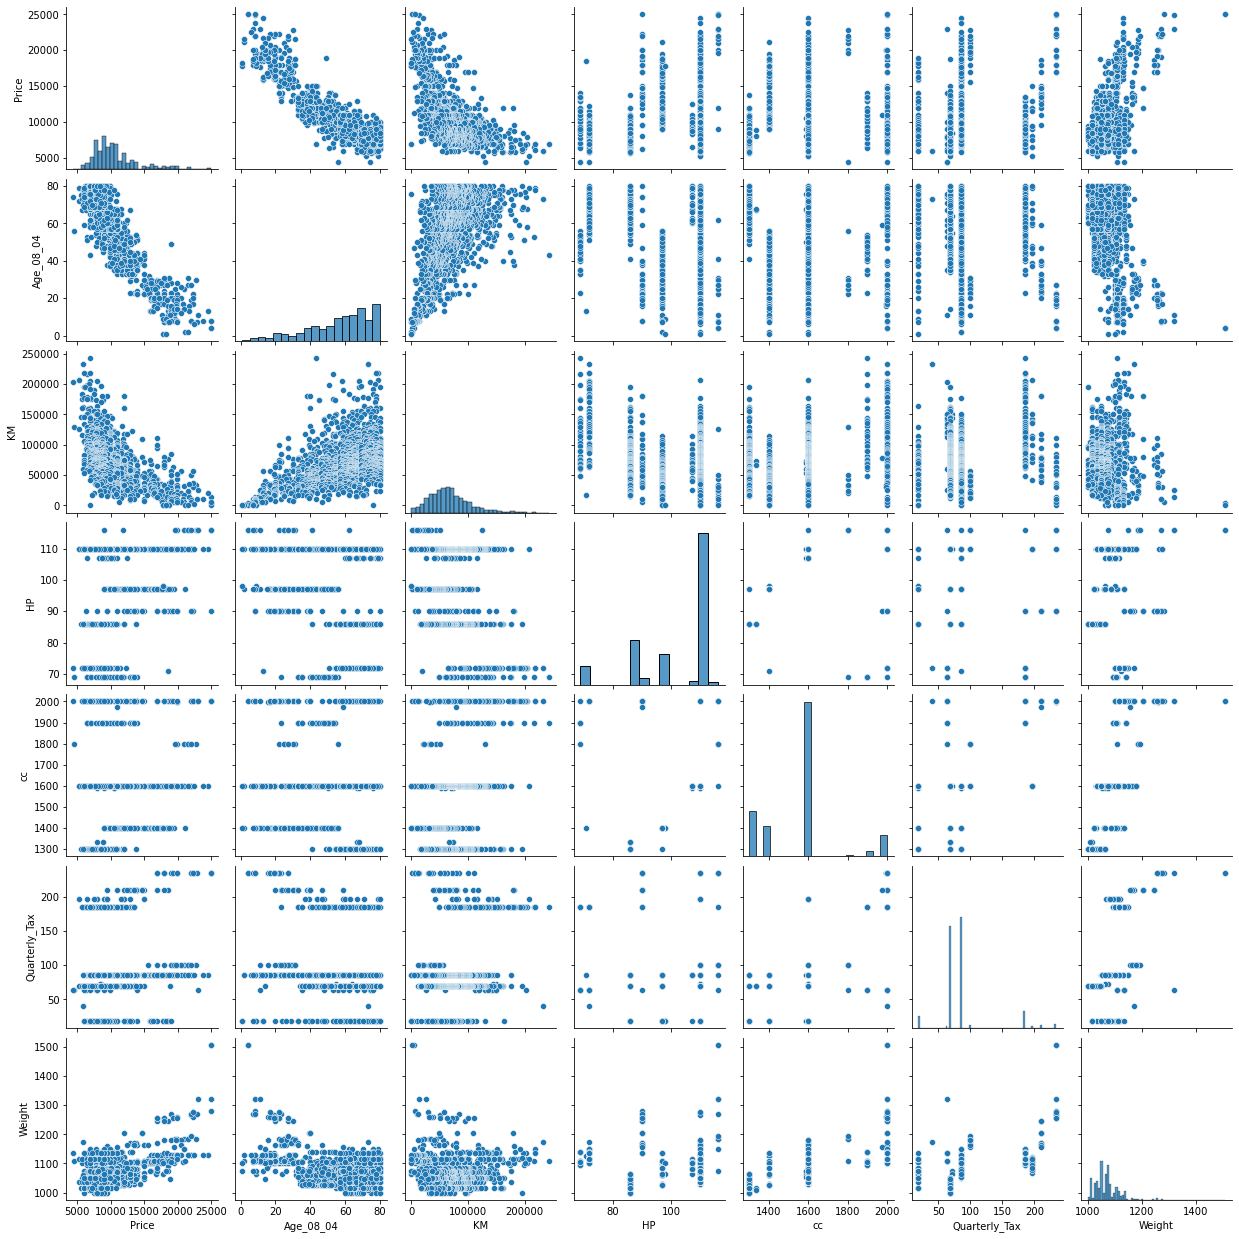

In [72]:
sns.pairplot(corolla1.iloc[:,:7])

In [73]:
model2.resid

0      -2727.438713
1      -2032.337771
2      -2254.302384
3       -919.214082
4      -1982.990948
           ...     
1431   -1634.613194
1432    2335.298948
1433    -157.340782
1434   -1522.666913
1435   -3903.216218
Length: 1415, dtype: float64

In [74]:
model2_pred_profit=pd.DataFrame(model2.predict())
model2_pred_profit

,0
0,16227.438713
1,15782.337771
2,16204.302384
3,15869.214082
4,15732.990948
...,...
1410,9134.613194
1411,8509.701052
1412,8657.340782
1413,8772.666913


In [75]:
corolla.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [76]:
corolla1['Age_sq']=corolla1.Age_08_04**2
corolla1['Age_sqrt']=corolla1.Age_08_04**0.5
corolla1['Age_log']=np.log(corolla1.Age_08_04)

In [77]:
corolla1.loc[:,['Price','Age_08_04','Age_sq','Age_sqrt','Age_log']].corr()

,Price,Age_08_04,Age_sq,Age_sqrt,Age_log
Price,1.000000,-0.890860,-0.830378,-0.906145,-0.879472
Age_08_04,-0.890860,1.000000,0.978001,0.988355,0.930836
Age_sq,-0.830378,0.978001,1.000000,0.936977,0.846699
Age_sqrt,-0.906145,0.988355,0.936977,1.000000,0.974081
Age_log,-0.879472,0.930836,0.846699,0.974081,1.000000


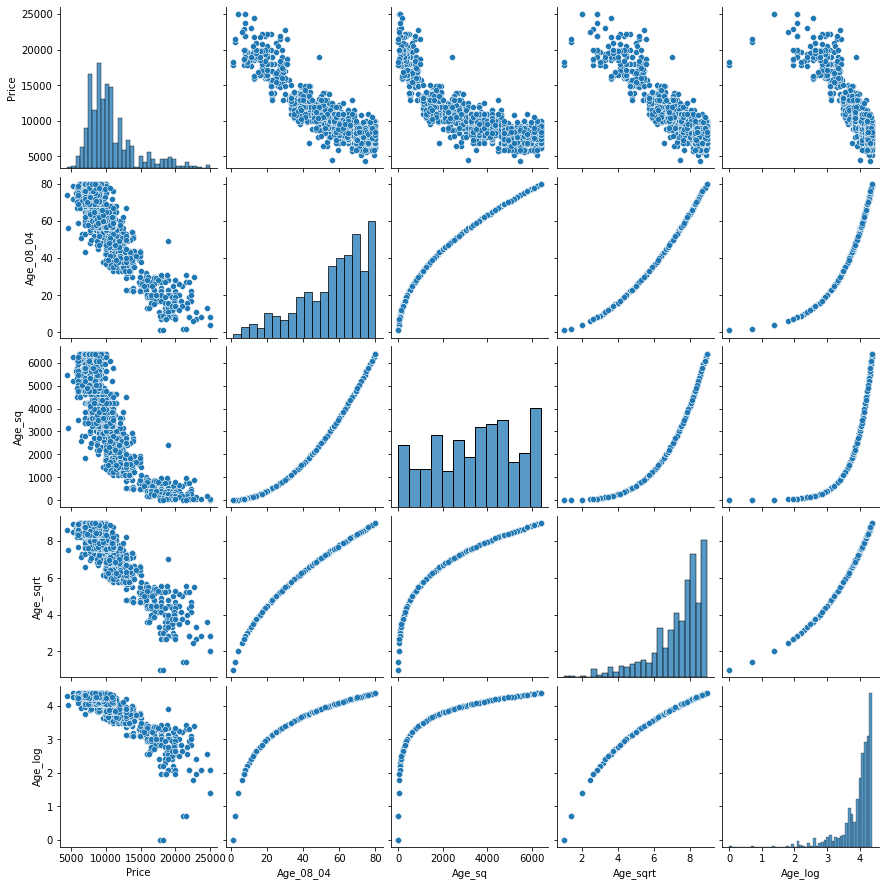

In [78]:
sns.pairplot(corolla1.loc[:,['Price','Age_08_04','Age_sq','Age_sqrt','Age_log']])

In [79]:
#Age_sqrt shows good linearity 
model3=smf.ols('Price~Age_sqrt+KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=corolla1).fit()

In [80]:
model3.rsquared#have higher rsquared value

0.8888112793050666

In [81]:
model3.params

Intercept       -1122.433406
Age_sqrt        -1546.098725
KM                 -0.016886
HP                 25.345364
cc                 -2.415729
Doors_3          -404.638953
Doors_4          -138.026030
Doors_5          -579.768423
Gears_5          -917.149109
Gears_6          -205.284297
Quarterly_Tax       2.342349
Weight             24.940854
dtype: float64

In [82]:
model3.pvalues

Intercept         1.320183e-01
Age_sqrt         4.115655e-300
KM                6.200194e-45
HP                3.372275e-15
cc                1.165049e-14
Doors_3           1.016007e-01
Doors_4           5.708052e-01
Doors_5           3.479979e-02
Gears_5           1.279753e-02
Gears_6           6.083863e-01
Quarterly_Tax     9.286375e-02
Weight            7.993617e-67
dtype: float64

In [83]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1248.
Date:                Thu, 11 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:14:04   Log-Likelihood:                -11986.
No. Observations:                1415   AIC:                         2.399e+04
Df Residuals:                    1405   BIC:                         2.404e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1122.4334    744.780     -1.507      0.132   -2583.434     338.567
Age_sqrt      -1546.0987     32.070    -48.210      0.000   -1609.009   -1483.188
KM               -0.0169      0.001    -14.578      0.000      -0.019      -0.015
HP               25.3454      3.182      7.965      0.000      19.104      31.587
cc               -2.4157      0.310     -7.804      0.000      -3.023      -1.808
Doors_3        -404.6390    247.000     -1.638      0.102    -889.167      79.889
Doors_4        -138.0260    243.432     -0.567      0.571    -615.556     339.504
Doors_5        -579.7684    274.417     -2.113      0.035   -1118.079     -41.458
Gears_5        -917.1491    367.957     -2.493      0.013   -1638.953    -195.345
Gears_6        -205.2843    400.560     -0.512      0.608    -991.044     580.476
Quarterly_Tax     2.3423      1.393      1.682      0.093      -0.390       5.075
Weight           24.9409      1.368     18.231      0.000      22.257      27.624
==============================================================================
Omnibus:                      111.443   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              444.910
Skew:                           0.273   Prob(JB):                     2.45e-97
Kurtosis:                       5.692   Cond. No.                     1.23e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.69e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [84]:
model3.resid

0      -2845.151965
1      -2156.941221
2      -2324.749121
3       -909.270911
4      -1809.649060
           ...     
1431   -1631.260541
1432    2213.298032
1433    -256.627250
1434   -1600.385276
1435   -3703.494733
Length: 1415, dtype: float64

In [85]:
model3.predict()

array([16345.15196474, 15906.94122055, 16274.74912053, ...,
        8756.62724973,  8850.38527617, 10653.49473289])

In [86]:
#applying transformation on km column
corolla1['KM_sq']=corolla1.KM**2
corolla1['KM_sqrt']=corolla1.KM**0.5
corolla1['KM_log']=np.log(corolla1.KM)

In [87]:
corolla1.loc[:,['Price','KM','KM_sq','KM_sqrt','KM_log']].corr()# km_sqrt shows more linearity

,Price,KM,KM_sq,KM_sqrt,KM_log
Price,1.000000,-0.574618,-0.441894,-0.639419,-0.528985
KM,-0.574618,1.000000,0.944045,0.971702,0.670011
KM_sq,-0.441894,0.944045,1.000000,0.850463,0.514168
KM_sqrt,-0.639419,0.971702,0.850463,1.000000,0.791462
KM_log,-0.528985,0.670011,0.514168,0.791462,1.000000


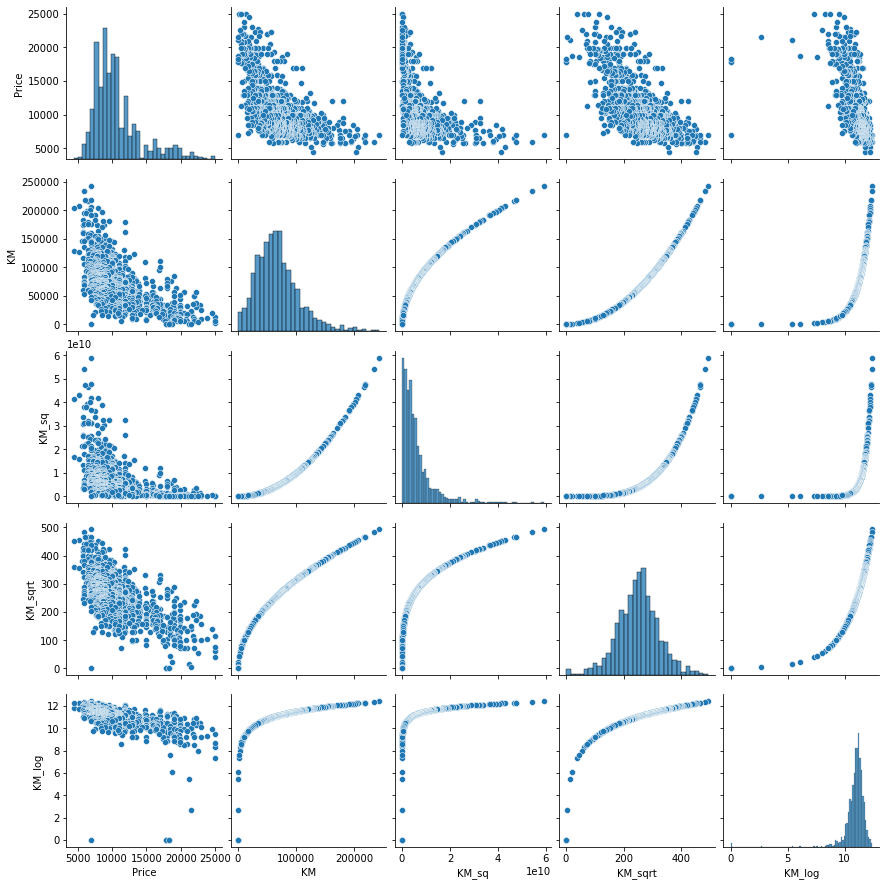

In [88]:
sns.pairplot(corolla1.loc[:,['Price','KM','KM_sq','KM_sqrt','KM_log']])

In [89]:
corolla1['KM_sqrt4']=corolla1.KM**0.4
corolla1['KM_sqrt3']=corolla1.KM**0.3
corolla1['KM_sqrt2']=corolla1.KM**0.2


In [90]:
corolla1.loc[:,['Price','KM','KM_sqrt','KM_sqrt4','KM_sqrt3','KM_sqrt2']].corr()

,Price,KM,KM_sqrt,KM_sqrt4,KM_sqrt3,KM_sqrt2
Price,1.000000,-0.574618,-0.639419,-0.647811,-0.650554,-0.641192
KM,-0.574618,1.000000,0.971702,0.954059,0.926606,0.881008
KM_sqrt,-0.639419,0.971702,1.000000,0.997565,0.987524,0.961906
KM_sqrt4,-0.647811,0.954059,0.997565,1.000000,0.996045,0.978186
KM_sqrt3,-0.650554,0.926606,0.987524,0.996045,1.000000,0.992670
KM_sqrt2,-0.641192,0.881008,0.961906,0.978186,0.992670,1.000000


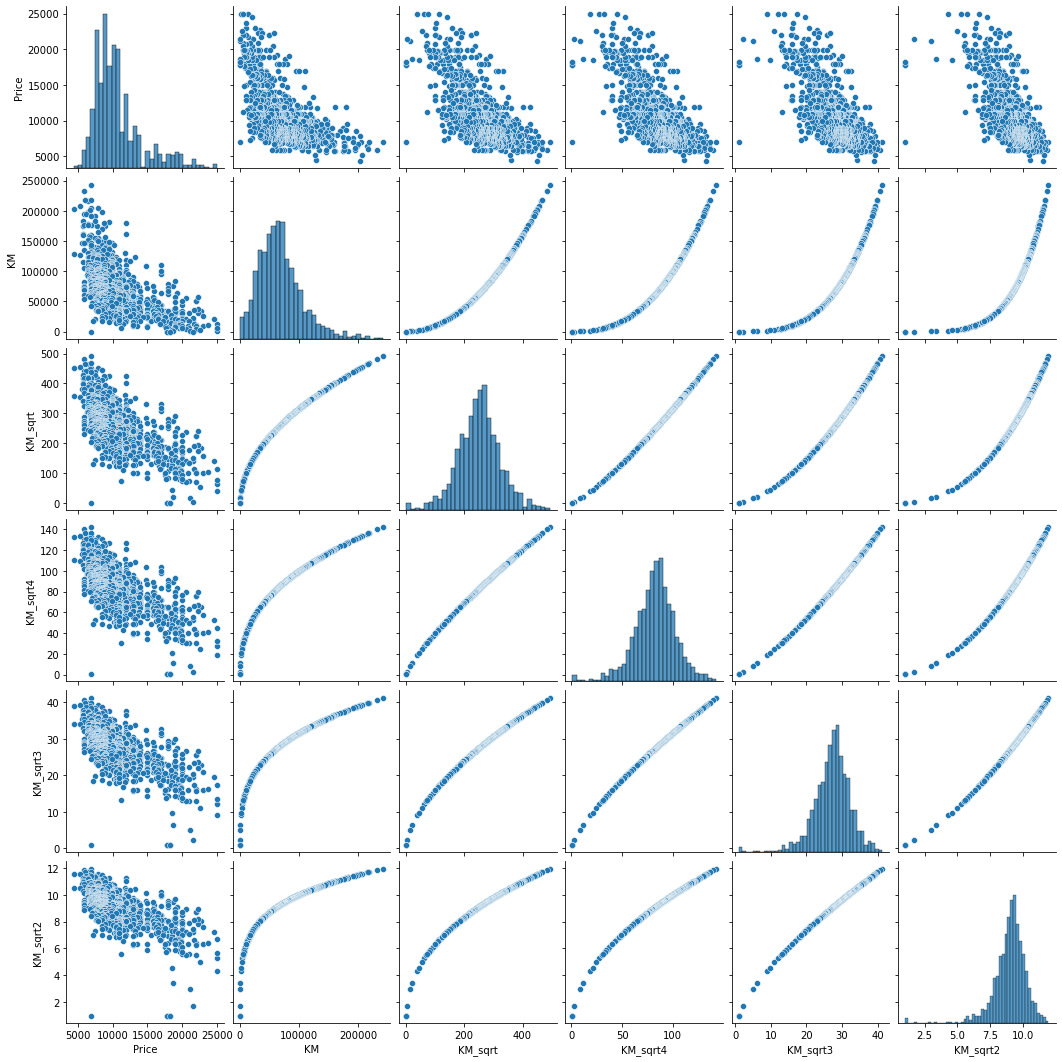

In [91]:
sns.pairplot(corolla1.loc[:,['Price','KM','KM_sqrt','KM_sqrt4','KM_sqrt3','KM_sqrt2']])


In [92]:
model4=smf.ols('Price~Age_sqrt+KM_sqrt+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=corolla1).fit()
model4_sqrt4=smf.ols('Price~Age_sqrt+KM_sqrt4+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=corolla1).fit()
model4_sqrt3=smf.ols('Price~Age_sqrt+KM_sqrt3+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=corolla1).fit()
model4_sqrt2=smf.ols('Price~Age_sqrt+KM_sqrt2+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=corolla1).fit()


In [93]:
print(model4.rsquared,model4_sqrt4.rsquared,model4_sqrt3.rsquared,model4_sqrt2.rsquared,sep='\n')

0.8850377635102371
0.8832479286608808
0.8807920588201491
0.8776002747670786


In [94]:
model4.rsquared

0.8850377635102371

In [95]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1202.
Date:                Thu, 11 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:14:14   Log-Likelihood:                -12009.
No. Observations:                1415   AIC:                         2.404e+04
Df Residuals:                    1405   BIC:                         2.409e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -648.2432    757.558     -0.856      0.392   -2134.309     837.823
Age_sqrt      -1525.6683     34.573    -44.129      0.000   -1593.489   -1457.847
KM_sqrt          -8.0065      0.634    -12.626      0.000      -9.250      -6.763
HP               29.6345      3.181      9.317      0.000      23.395      35.874
cc               -2.6786      0.312     -8.575      0.000      -3.291      -2.066
Doors_3        -228.9043    251.145     -0.911      0.362    -721.564     263.756
Doors_4          -2.8160    247.591     -0.011      0.991    -488.504     482.872
Doors_5        -416.5229    279.209     -1.492      0.136    -964.235     131.189
Gears_5        -674.8630    374.090     -1.804      0.071   -1408.699      58.973
Gears_6          26.6198    407.583      0.065      0.948    -772.917     826.157
Quarterly_Tax     2.9545      1.421      2.080      0.038       0.167       5.742
Weight           24.7064      1.392     17.747      0.000      21.976      27.437
==============================================================================
Omnibus:                      113.128   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              540.805
Skew:                           0.186   Prob(JB):                    3.68e-118
Kurtosis:                       6.006   Cond. No.                     2.87e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.37e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [96]:
model4.resid

0      -2608.968840
1      -1932.172953
2      -2101.919757
3       -677.777497
4      -1607.440913
           ...     
1431   -1721.584744
1432    2099.085492
1433    -395.338789
1434   -1739.265028
1435   -4555.026197
Length: 1415, dtype: float64

In [97]:
model4.predict()

array([16108.96883953, 15682.17295334, 16051.91975746, ...,
        8895.33878879,  8989.26502819, 11505.02619676])

In [98]:
corolla1['WT_sq']=corolla1.Weight**2
corolla1['WT_sqrt']=corolla1.Weight**0.5
corolla1['WT_log']=np.log(corolla1.Weight)
corolla1['WT_sq3']=corolla1.Weight**3
corolla1['WT_sq4']=corolla1.Weight**4

In [99]:
corolla1.loc[:,['Price','Weight','WT_sq','WT_sqrt','WT_log','WT_sq3','WT_sq4']].corr()

,Price,Weight,WT_sq,WT_sqrt,WT_log,WT_sq3,WT_sq4
Price,1.000000,0.594576,0.592910,0.594365,0.593579,0.587801,0.578433
Weight,0.594576,1.000000,0.997959,0.999560,0.998327,0.991015,0.977891
WT_sq,0.592910,0.997959,1.000000,0.995630,0.992610,0.997526,0.989200
WT_sqrt,0.594365,0.999560,0.995630,1.000000,0.999602,0.986635,0.971329
WT_log,0.593579,0.998327,0.992610,0.999602,1.000000,0.981684,0.964336
WT_sq3,0.587801,0.991015,0.997526,0.986635,0.981684,1.000000,0.997048
WT_sq4,0.578433,0.977891,0.989200,0.971329,0.964336,0.997048,1.000000


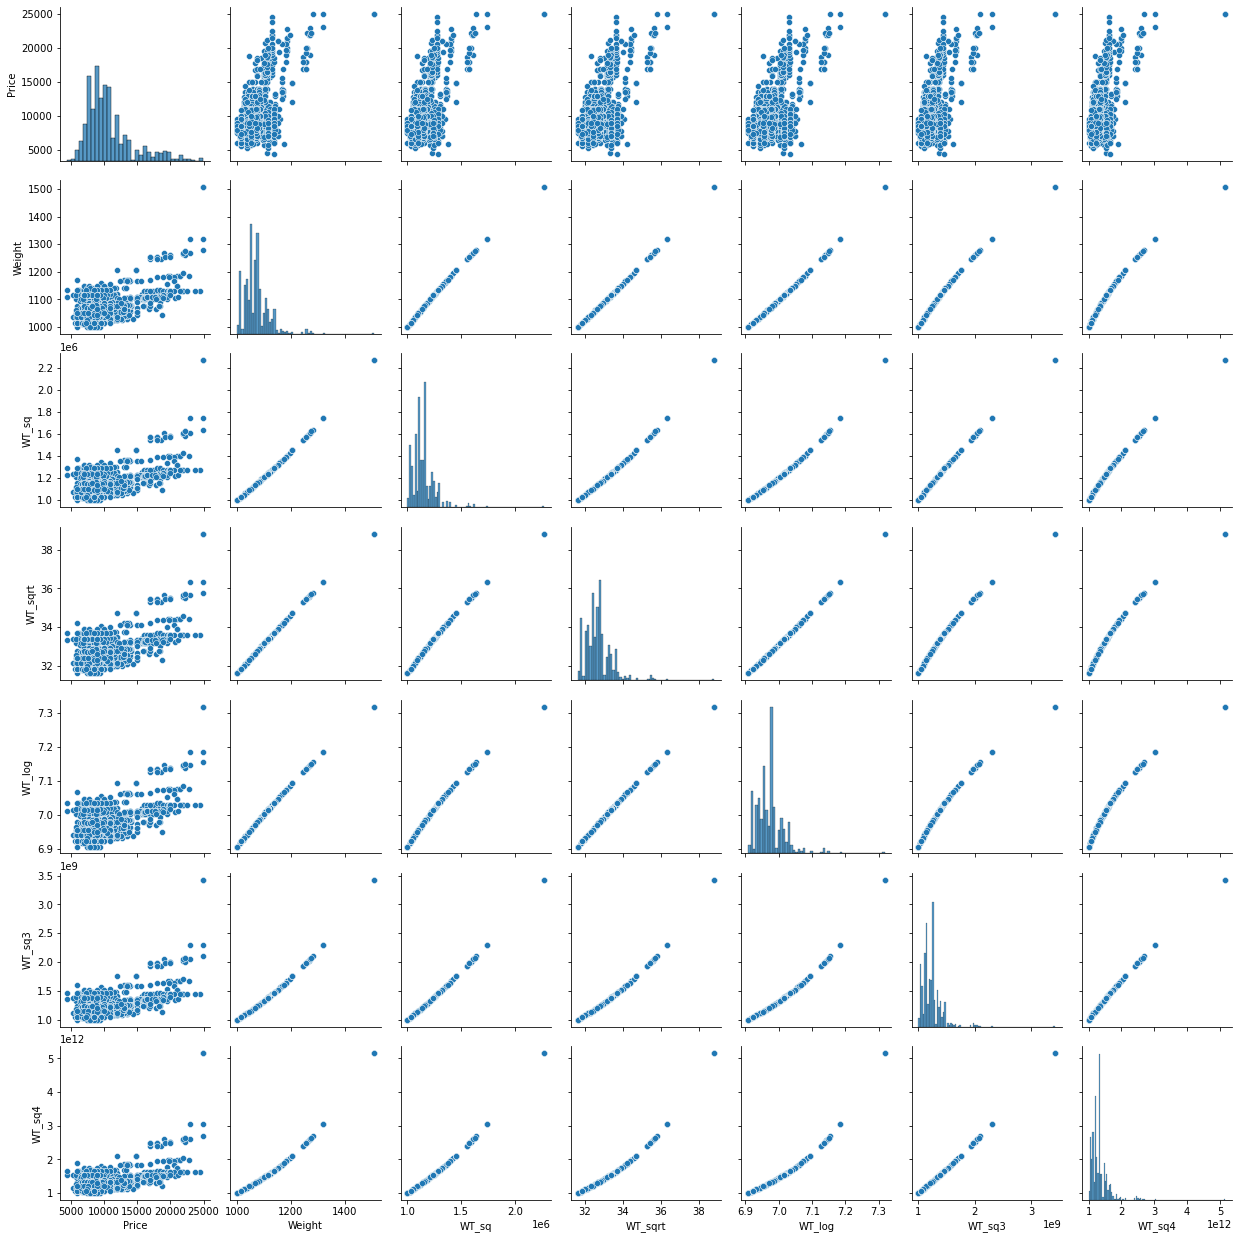

In [100]:
sns.pairplot(corolla1.loc[:,['Price','Weight','WT_sq','WT_sqrt','WT_log','WT_sq3','WT_sq4']])

In [108]:
model5_sq=smf.ols('Price~Age_sqrt+KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+WT_sq',data=corolla1).fit()
model5_sq3=smf.ols('Price~Age_sqrt+KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+WT_sq3',data=corolla1).fit()
model5_sq4=smf.ols('Price~Age_sqrt+KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+WT_sq4',data=corolla1).fit()


In [109]:
print(model5_sq.rsquared)
print(model5_sq3.rsquared)
print(model5_sq4.rsquared)

0.8871581916030884
0.8848161542390689
0.8820102339468938


In [110]:
model5_sq.params

Intercept        6863.032734
Age_sqrt        -1572.968766
KM                 -0.016799
HP                 25.289084
cc                 -2.027866
Doors_3          2247.155503
Doors_4          2472.365685
Doors_5          2143.511546
Gears_5          3054.744605
Gears_6          3808.288128
Quarterly_Tax       2.434656
WT_sq               0.010139
dtype: float64

In [111]:
model5_sq.pvalues

Intercept         2.748144e-68
Age_sqrt         8.175095e-310
KM                6.434328e-44
HP                6.116692e-15
cc                3.490261e-11
Doors_3           5.674125e-65
Doors_4           1.188102e-64
Doors_5           2.223346e-44
Gears_5           8.515785e-56
Gears_6           6.624444e-56
Quarterly_Tax     8.367079e-02
WT_sq             2.625835e-62
dtype: float64

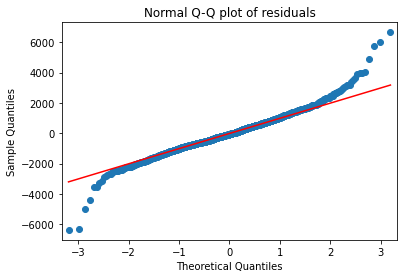

In [112]:
qqplot=sm.qqplot(model5_sq.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

<AxesSubplot:>

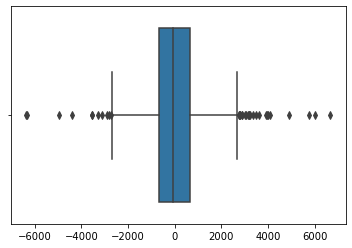

In [113]:
sns.boxplot(model5_sq.resid)

<AxesSubplot:ylabel='Density'>

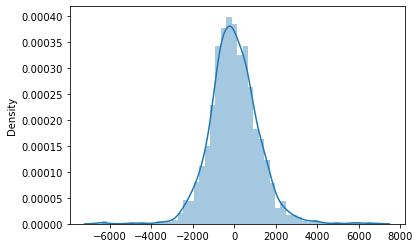

In [114]:
sns.distplot(model5_sq.resid)

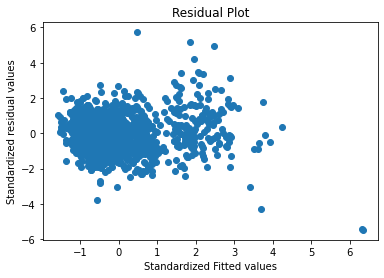

In [115]:
plt.scatter(get_standardized_values(model5_sq.fittedvalues),
            get_standardized_values(model5_sq.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [116]:
model5_sq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     1227.
Date:                Thu, 11 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:14:31   Log-Likelihood:                -11996.
No. Observations:                1415   AIC:                         2.401e+04
Df Residuals:                    1405   BIC:                         2.407e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6863.0327    371.813     18.458      0.000    6133.664    7592.401
Age_sqrt      -1572.9688     31.814    -49.443      0.000   -1635.376   -1510.561
KM               -0.0168      0.001    -14.393      0.000      -0.019      -0.015
HP               25.2891      3.206      7.888      0.000      19.000      31.578
cc               -2.0279      0.304     -6.678      0.000      -2.624      -1.432
Doors_3        2247.1555    125.249     17.942      0.000    2001.461    2492.850
Doors_4        2472.3657    138.190     17.891      0.000    2201.285    2743.447
Doors_5        2143.5115    148.059     14.477      0.000    1853.072    2433.952
Gears_5        3054.7446    185.596     16.459      0.000    2690.669    3418.820
Gears_6        3808.2881    231.125     16.477      0.000    3354.902    4261.674
Quarterly_Tax     2.4347      1.407      1.731      0.084      -0.324       5.194
WT_sq             0.0101      0.001     17.519      0.000       0.009       0.011
==============================================================================
Omnibus:                      125.456   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              632.439
Skew:                           0.234   Prob(JB):                    4.65e-138
Kurtosis:                       6.242   Cond. No.                     2.87e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.3e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [117]:
#model3 and model5_sq gives more rsquare values